In [21]:
# Python ≥3.5 is required
import sys
import sklearn
import os
datapath = os.path.join('datasets', 'lifesat','')
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [22]:
# Download the data
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

In [23]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    #Pick only 'INEQUALITY'==TOT
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    
    # pivot mathod --explained next space
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    
    # rename columns name
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    
    # set index to 'country'
    gdp_per_capita.set_index("Country", inplace=True)
    
    #merge two csv
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    
    # sort by 'GDP per capita'
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    
    # remove  some index
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

--for practice--
### pivot method

DataFrame.pivot(*, index=None, columns=None, values=None)[source]
Return reshaped DataFrame organized by given index / column values.

Reshape data (produce a “pivot” table) based on column values. Uses unique values from specified index / columns to form axes of the resulting DataFrame. 

In [24]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two',
                           'two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})
df


,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [25]:
df.pivot(index='foo', columns='bar', values='baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [26]:
df.pivot(index='foo', columns='bar', values=['baz', 'zoo'])

baz       zoo      
bar   A  B  C   A  B  C
foo                    
one   1  2  3   x  y  z
two   4  5  6   q  w  t

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

#Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

In [28]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [29]:
gdp_per_capita.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [30]:
GDP = pd.DataFrame(gdp_per_capita['GDP per capita'])
GDP.head()

,GDP per capita
Country,
Afghanistan,599.994
Albania,3995.383
Algeria,4318.135
Angola,4100.315
Antigua and Barbuda,14414.302


In [31]:
country_stats.head()

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


In [32]:
#Prepare the data
X = np.c_[country_stats['GDP per capita']]
X[:5]

array([[ 9054.914],
       [ 9437.372],
       [12239.894],
       [12495.334],
       [15991.736]])

In [33]:
y = np.c_[country_stats['Life satisfaction']]
y[:5]

array([[6. ],
       [5.6],
       [4.9],
       [5.8],
       [6.1]])

In [34]:
#np.c_: Translates slice objects to concatenation along the second axis.
np.c_[np.array([1,2,3]), np.array([4,5,6])]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [35]:
np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]

array([[1, 2, 3, 0, 0, 4, 5, 6]])

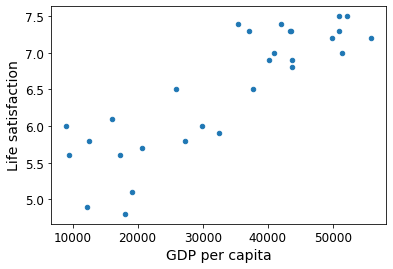

In [36]:
#Visualize the data
country_stats.plot(kind='scatter', x='GDP per capita', 
                 y = 'Life satisfaction')
plt.show()

In [37]:
import sklearn.linear_model
# Select a linear model
model = sklearn.linear_model.LinearRegression()

#Train the model
model.fit(X, y)

LinearRegression()

In [49]:
#Make a prediction for Cyprus
X_new = [[22587]]
print(model.predict(X_new))

[[5.96242338]]


In [ ]:
import sklearn.linear_model
# Select a linear model
model = sklearn.linear_model.LinearRegression()

#Train the model
model.fit(X, y)

#Make a prediction for Cyprus
X_new = [[22587]]
print(model.predict(X_new))

## Self Practice Handling CSV

In [38]:
import pandas as pd
import numpy as np
data = pd.read_csv('./datasets/titanic/Train_Titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
#pick only non survived
non_survived = data[data['Survived']==0]

In [40]:
non_survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [41]:
#df.drop(['B', 'C'], axis=1)
non_survived = non_survived.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [42]:
non_survived.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,NaN,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S


In [43]:
#pivot
non_survived.set_index('Age', inplace=True)

In [44]:
non_survived.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
Age,,,,,,,,
22.0,1,0,3,male,1,0,7.2500,S
35.0,5,0,3,male,0,0,8.0500,S
NaN,6,0,3,male,0,0,8.4583,Q
54.0,7,0,1,male,0,0,51.8625,S
2.0,8,0,3,male,3,1,21.0750,S


In [45]:
non_survived.sort_values(by='Fare', inplace=True)
non_survived.tail()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
Age,,,,,,,,
NaN,528,0,1,male,0,0,221.7792,S
NaN,558,0,1,male,0,0,227.5250,C
24.0,119,0,1,male,0,1,247.5208,C
64.0,439,0,1,male,1,4,263.0000,S
19.0,28,0,1,male,3,2,263.0000,S


In [46]:
non_survived.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [47]:
new_non_survived = non_survived.pivot_table(index='Parch', columns='Sex',values='Fare', aggfunc='median')

In [48]:
new_non_survived.head()

Sex,female,male
Parch,,
0,9.4750,8.050
1,18.2875,29.125
2,31.2750,46.900
3,34.3750,34.375
4,24.4875,145.450


# Prcatice : Linear Regression

In [71]:
housing = pd.read_csv('./datasets/housing/housing.csv')

In [72]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [142]:
housing = pd.DataFrame(housing)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY
70,-122.29,37.81,26.0,768.0,152.0,392.0,127.0,1.7719,82500.0,NEAR BAY
74,-122.29,37.81,20.0,835.0,161.0,290.0,133.0,2.4830,137500.0,NEAR BAY
80,-122.28,37.81,17.0,924.0,289.0,609.0,289.0,1.5000,162500.0,NEAR BAY
84,-122.28,37.81,35.0,948.0,184.0,467.0,169.0,1.8088,118800.0,NEAR BAY


In [145]:
housing = housing[housing["ocean_proximity"]=="NEAR BAY"]
housing = housing[housing["total_bedrooms"] <= 1000]
housing = housing[housing["households"] <= 1000]
housing = housing[housing["total_rooms"] <= 2000]
housing = housing[housing["housing_median_age"] <= 50]
housing.shape

(58, 10)

In [135]:
housing3 = housing.get(['housing_median_age', 'median_house_value'])

In [136]:
housing3.sort_values(by='housing_median_age')


,housing_median_age,median_house_value
59,2.0,60000.0
854,2.0,237500.0
16174,10.0,180400.0
437,10.0,150000.0
88,10.0,137500.0
18931,11.0,122500.0
18227,14.0,266700.0
18238,15.0,175000.0
15729,16.0,146900.0
935,17.0,156300.0


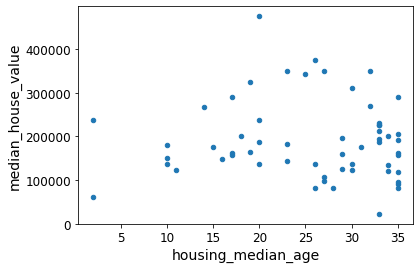

In [137]:
housing3.plot(kind='scatter', x='housing_median_age', y= 'median_house_value')
plt.show()

In [149]:
X = np.c_[housing3['housing_median_age']]
y = np.c_[housing3['median_house_value']]

import sklearn.linear_model
# Select a linear model
model = sklearn.linear_model.LinearRegression()

#Train the model
model.fit(X, y)

#Make a prediction for Cyprus
X_new = [[20]]
print(model.predict(X_new))

[[193144.12923923]]


Replacing the Linear Regression model with k-Nearest Neighbors (in this example, k = 3) regression in the previous code is as simple as replacing these two
lines:

```python
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
```

with these two:

```python
import sklearn.neighbors
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [155]:
import sklearn.neighbors
model1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

#Train the model
model1.fit(X, y)

#Make a prediction for Cyprus
print(model1.predict(X_new))

[[266666.66666667]]


### loc

In [82]:
df = pd.DataFrame([[1, 2], [4, 5], [7, 8]],
     index=['cobra', 'viper', 'sidewinder'],
     columns=['max_speed', 'shield'])
df

,max_speed,shield
cobra,1,2
viper,4,5
sidewinder,7,8


In [84]:
df.loc['cobra']

max_speed    1
shield       2
Name: cobra, dtype: int64

### drop

In [54]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [57]:
housing1 = housing.drop(['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 'households', 'median_income', 'ocean_proximity'], axis=1)

In [60]:
housing1.sort_values(by='median_house_value')

,total_bedrooms,median_house_value
9188,267.0,14999.0
19802,28.0,14999.0
2799,239.0,14999.0
2521,73.0,14999.0
5887,168.0,17500.0
...,...,...
16938,245.0,500001.0
16936,299.0,500001.0
16935,1619.0,500001.0
8291,785.0,500001.0


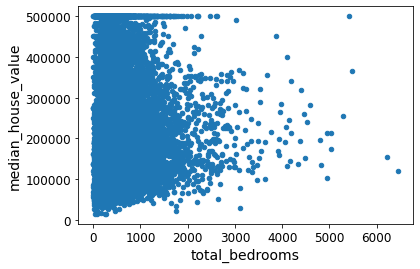

In [64]:
housing1.plot(kind='scatter', x='total_bedrooms', y= 'median_house_value')
plt.show()